In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Cleaned_StudentPerf_Final_Selected_Encoded.csv')

# Display the first few rows of the dataset
print(data.head())

   Gender  Caste  10th_Grade_Performance  12th_Grade_Performance  \
0  Female      0                       1                       1   
1    Male      2                       3                       3   
2  Female      2                       1                       1   
3    Male      1                       2                       1   
4    Male      0                       1                       1   

   Internal_Assessment_Performance  End_Semester_Performance  \
0                                3                         1   
1                                3                         3   
2                                3                         1   
3                                3                         1   
4                                3                         3   

   Regular_Attendance Marital_Status Living_Status Accommodation_Status  \
0                   1         Single         Rural      Private Renting   
1                   0         Single         Rural      

In [2]:
# Summary statistics
summary_stats = data.describe(include='all')
print(summary_stats)

       Gender       Caste  10th_Grade_Performance  12th_Grade_Performance  \
count     131  131.000000              131.000000              131.000000   
unique      2         NaN                     NaN                     NaN   
top      Male         NaN                     NaN                     NaN   
freq       72         NaN                     NaN                     NaN   
mean      NaN    1.618321                1.702290                1.763359   
std       NaN    1.378171                0.966315                0.967408   
min       NaN    0.000000                0.000000                0.000000   
25%       NaN    0.000000                1.000000                1.000000   
50%       NaN    2.000000                1.000000                1.000000   
75%       NaN    2.000000                3.000000                3.000000   
max       NaN    4.000000                3.000000                3.000000   

        Internal_Assessment_Performance  End_Semester_Performance  \
count 

In [3]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'Female'

In [4]:
# Convert categorical variables to numeric values using encoding techniques
categorical_columns = ['Gender', 'Caste', 'Marital_Status', 'Living_Status', 'Accommodation_Status', 'Family_Size', 'Father_Occupation', 'Mother_Occupation', 'Schooling_History', 'School_Sector', 'Medium_of_Education', 'Transport_Type', 'Overall_Attendance']

for column in categorical_columns:
    data[column] = data[column].astype('category').cat.codes

# Display the first few rows of the dataset after encoding
print(data.head())

   Gender  Caste  10th_Grade_Performance  12th_Grade_Performance  \
0       0      0                       1                       1   
1       1      2                       3                       3   
2       0      2                       1                       1   
3       1      1                       2                       1   
4       1      0                       1                       1   

   Internal_Assessment_Performance  End_Semester_Performance  \
0                                3                         1   
1                                3                         3   
2                                3                         1   
3                                3                         1   
4                                3                         3   

   Regular_Attendance  Marital_Status  Living_Status  Accommodation_Status  \
0                   1               0              0                     0   
1                   0               0             

In [5]:
# Check for non-numeric columns that might cause issues in correlation calculation
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index([], dtype='object')


In [6]:
# Drop non-numeric columns for correlation calculation
data_numeric = data.drop(columns=non_numeric_columns)

In [7]:
# Correlation matrix
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                                   Gender     Caste  10th_Grade_Performance  \
Gender                           1.000000 -0.016977                0.006935   
Caste                           -0.016977  1.000000                0.006437   
10th_Grade_Performance           0.006935  0.006437                1.000000   
12th_Grade_Performance          -0.094917  0.024047                0.269661   
Internal_Assessment_Performance -0.053492  0.040369                0.098675   
End_Semester_Performance         0.069780  0.140074                0.293045   
Regular_Attendance               0.027204  0.138537                0.012580   
Marital_Status                        NaN       NaN                     NaN   
Living_Status                   -0.014600 -0.256753               -0.093466   
Accommodation_Status             0.055056 -0.056416               -0.122533   
Family_Monthly_Income           -0.107330 -0.060353                0.084731   
Family_Size                      0.084610 -0.177231 

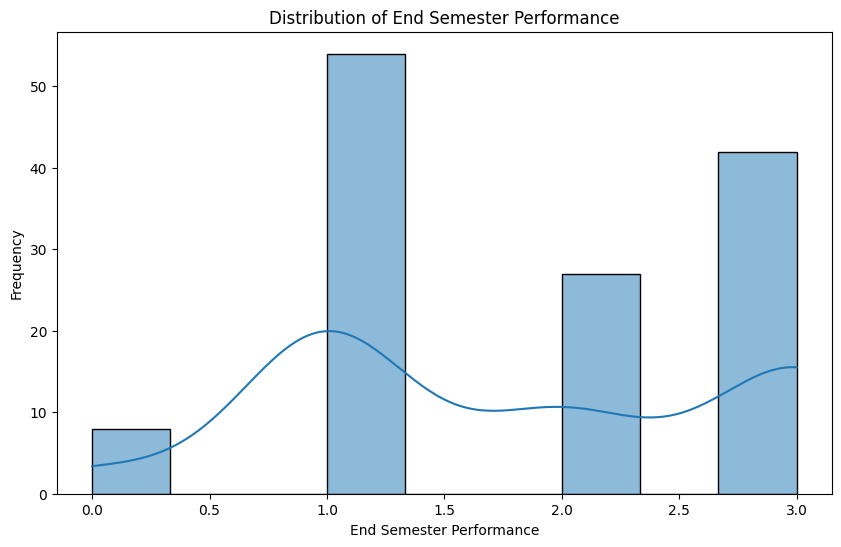

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of End Semester Performance
plt.figure(figsize=(10, 6))
sns.histplot(data['End_Semester_Performance'], kde=True)
plt.title('Distribution of End Semester Performance')
plt.xlabel('End Semester Performance')
plt.ylabel('Frequency')
plt.show()

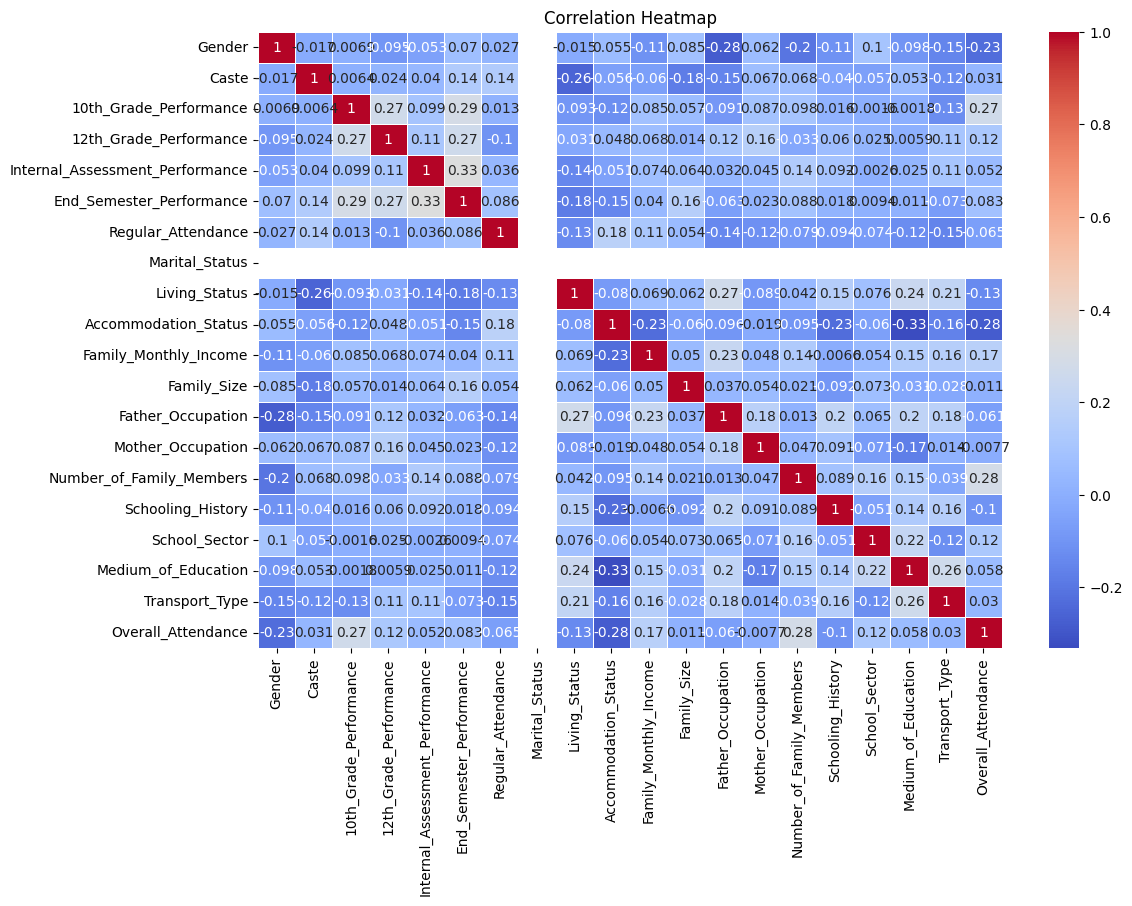

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

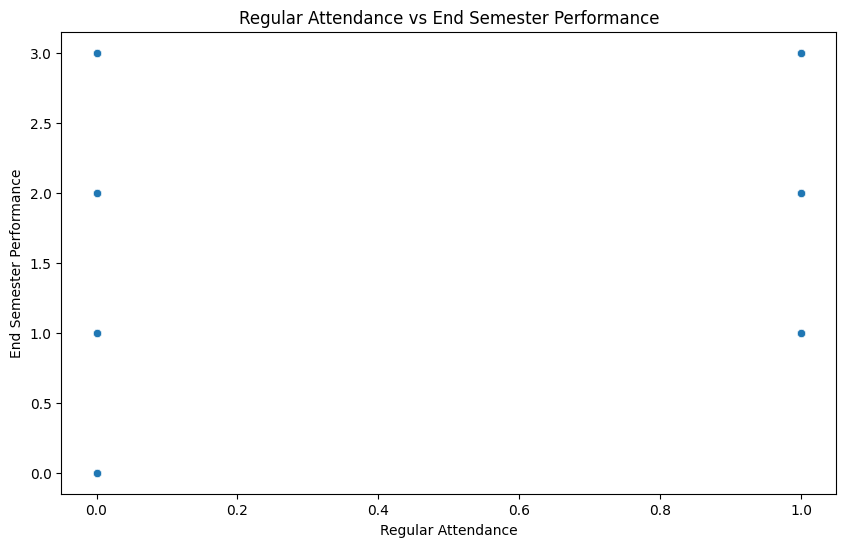

In [10]:
# Scatter plot of Regular Attendance vs End Semester Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Regular_Attendance', y='End_Semester_Performance', data=data)
plt.title('Regular Attendance vs End Semester Performance')
plt.xlabel('Regular Attendance')
plt.ylabel('End Semester Performance')
plt.show()

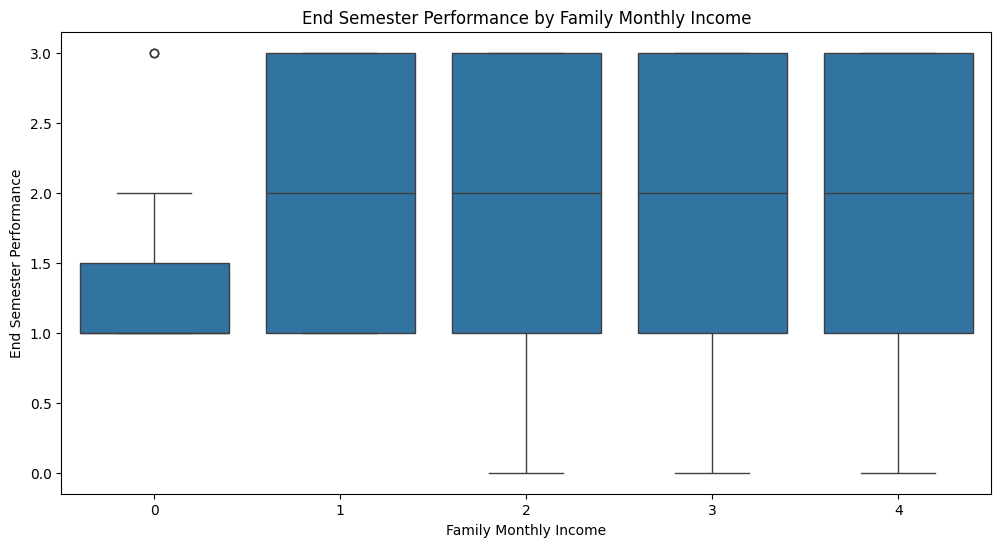

In [11]:
# Box plot of End Semester Performance by Family Monthly Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_Monthly_Income', y='End_Semester_Performance', data=data)
plt.title('End Semester Performance by Family Monthly Income')
plt.xlabel('Family Monthly Income')
plt.ylabel('End Semester Performance')
plt.show()